
# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data.

### Instructions

1. Import the necessary libraries if you are starting a new notebook.
2. Load the continuous and discrete variables into `continuous_df` and `discrete_df` variables.
3. Plot a correlation matrix, what can you see?
4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
5. What can you see in the plots?
6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
7. Have you found outliers? If you have, what should we do with them?
8. Check nan values per column.
9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.
10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
11. Get categorical features.
12. What should we do with the customer id column?

1. Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

2. Load the continuous and discrete variables into `continuous_df` and `discrete_df` variables.

In [30]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
#df

In [20]:
def likely_cat(df):
    likely_category = {}
    for var in df.columns:
        if df[var].dtype == object:
            likely_category[var]='categorical'
        elif 1.*df[var].nunique()/df[var].count() <= 0.02: #or some other threshold
            likely_category[var] = 'discrete'
        else:
            likely_category[var] = 'continuous'
    likely_category = pd.DataFrame.from_dict(likely_category, orient='index', columns=['likely_cat'])
    return likely_category

In [22]:
likely_cats=likely_cat(df)
display(likely_cats)

continuous_df=df[likely_cats.loc[likely_cats['likely_cat'] == 'continuous'].index.to_list()]
discrete_df=df[likely_cats.loc[likely_cats['likely_cat'] == 'discrete'].index.to_list()]

print('Continuous data')
display(continuous_df)
print('Discrete data')
display(discrete_df)

,likely_cat
Customer,categorical
State,categorical
Customer Lifetime Value,continuous
Response,categorical
Coverage,categorical
Education,categorical
Effective To Date,categorical
EmploymentStatus,categorical
Gender,categorical
Income,continuous


Continuous data


,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


Discrete data


,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


3. Plot a correlation matrix, what can you see?

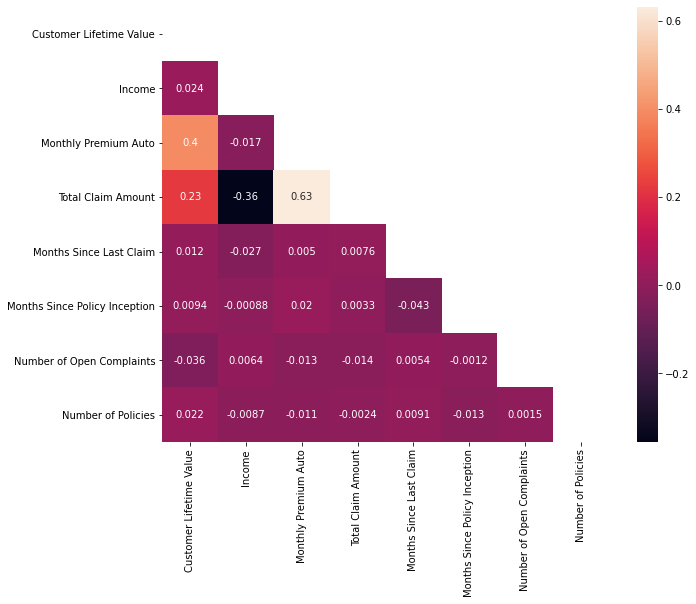

In [23]:
#Concatenate continuous and discrete df's
numerical_df=pd.concat([continuous_df,discrete_df],axis=1)

# check the correlations
mask = np.zeros_like(numerical_df.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numerical_df.corr(), mask=mask, annot=True)
plt.show()

In general, there is little to no correlation between the variables.

Exceptions are Total Claim Amount vs Customer Lifetime Value and vs Income, and Monthly Premium Auto vs Customer Lifetime Value and vs Total Claim Amount.

4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

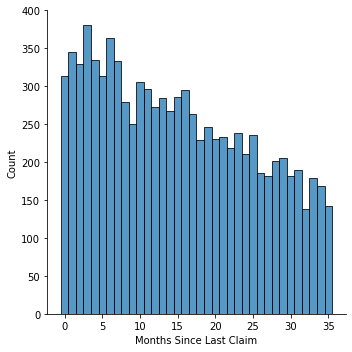

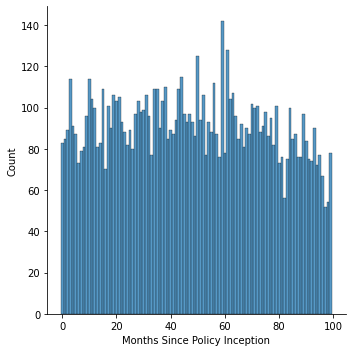

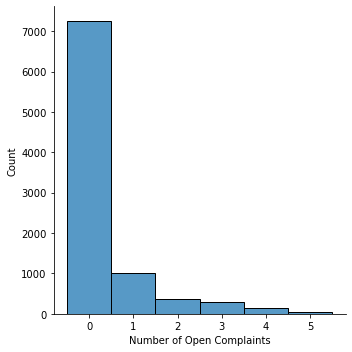

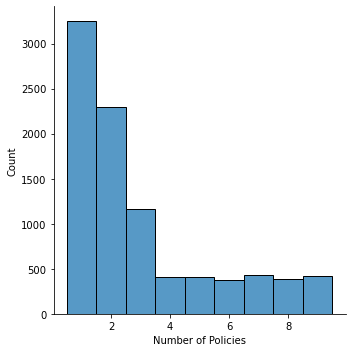

In [24]:
for column in discrete_df.columns:
    sns.displot(discrete_df, x=column, discrete=True)

5. What can you see in the plots?

First, I decided to modify the threshold for considering a variable continuous or discrete. In this case, "Monthly Premium Auto" had too many values to be considered discrete, and so I decided to consider it continuous.
Next, I can see different distributions, depending on the feature. For the number of policies and open complaints, there is seemingly an overlap.
For the months, no distribution is observed.

6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

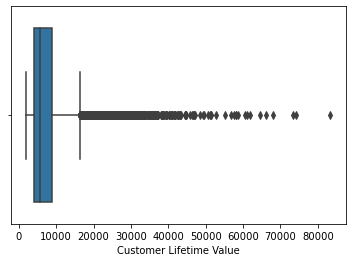

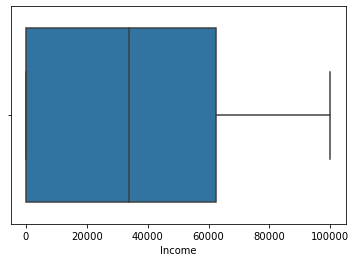

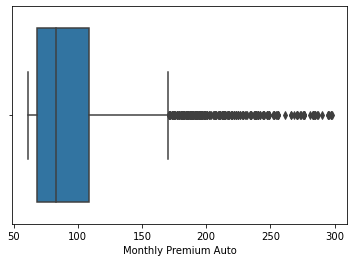

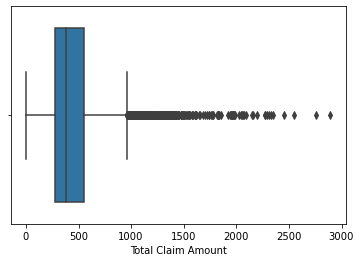

In [26]:
for col in continuous_df:
    sns.boxplot(x=continuous_df[col])#, whis=10) # whis is the parameter to choose your threshold, standard is 1.5
    plt.show()

7. Have you found outliers? If you have, what should we do with them?

Yes. I would try first with a BoxCox transformation. That should get rid of many outliers. That would be useful as a starting point for a further Feature Engineering.

8. Check nan values per column.

In [35]:
nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage_NaN'])
nulls.sort_values('percentage_NaN', ascending = False)

,percentage_NaN
Customer,0.0
State,0.0
Vehicle Class,0.0
Total Claim Amount,0.0
Sales Channel,0.0
Renew Offer Type,0.0
Policy,0.0
Policy Type,0.0
Number of Policies,0.0
Number of Open Complaints,0.0


9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.

In [36]:
def likely_cat(df):
    likely_category = {}
    for var in df.columns:
        if df[var].dtype == object:
            likely_category[var]='categorical'
        elif 1.*df[var].nunique()/df[var].count() <= 0.02: #or some other threshold
            likely_category[var] = 'discrete'
        else:
            likely_category[var] = 'continuous'
    likely_category = pd.DataFrame.from_dict(likely_category, orient='index', columns=['likely_cat'])
    return likely_category

10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [33]:
categorical_df=df.select_dtypes(exclude=["number","bool_"])
text=[]
for col in categorical_df.columns:
    if categorical_df[col].astype(str).str.contains('\\d', regex=True).all()== False:
        text.append(col)

#List of the columns that contain text, which may or may not need to be cleaned.        
text

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

11. Get categorical features.

In [32]:
categorical_df=df.select_dtypes(exclude=["number","bool_"])
categorical_df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


12. What should we do with the customer id column?

In [31]:
df['Customer'].nunique()

9134

If our goal is to use this data in a ML model, we should drop the customer_id column since it's a categorical feature unique for each index.